## Logistic Regression

Classifications algorithms and label as 0 and 1; L = { 0,1 } <br>

In [11]:
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import cv2
import sklearn
import imutils

# handle older versions of sklearn
if int((sklearn.__version__).split(".")[1]) < 18:
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# grab the small subset of dataset from the Wild dataset

print("[INFO] fetching data...")
dataset = datasets.fetch_lfw_people( min_faces_per_person=70, funneled=True, resize=0.5 )
(trainData, testData, trainLabels, testLabels)=train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=42 )


[INFO] fetching data...


In [9]:
print("[INFO] training model...")
model = LogisticRegression()
model.fit(trainData, trainLabels)
print(classification_report(testLabels, model.predict(testData), target_names=dataset.target_names))

[INFO] training model...
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.62      0.67        13
     Colin Powell       0.78      0.88      0.83        60
  Donald Rumsfeld       0.65      0.63      0.64        27
    George W Bush       0.93      0.90      0.91       146
Gerhard Schroeder       0.78      0.72      0.75        25
      Hugo Chavez       0.62      0.53      0.57        15
       Tony Blair       0.78      0.86      0.82        36

      avg / total       0.83      0.83      0.82       322



[PREDICTION] predicted: Ariel Sharon, actual: Colin Powell
[PREDICTION] predicted: Tony Blair, actual: Tony Blair
[PREDICTION] predicted: Colin Powell, actual: Colin Powell
[PREDICTION] predicted: Colin Powell, actual: Colin Powell
[PREDICTION] predicted: George W Bush, actual: George W Bush
[PREDICTION] predicted: Ariel Sharon, actual: Ariel Sharon
[PREDICTION] predicted: Colin Powell, actual: Colin Powell
[PREDICTION] predicted: George W Bush, actual: George W Bush
[PREDICTION] predicted: George W Bush, actual: Colin Powell
[PREDICTION] predicted: George W Bush, actual: George W Bush


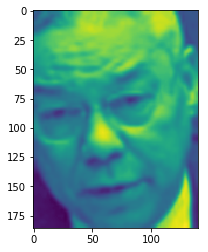

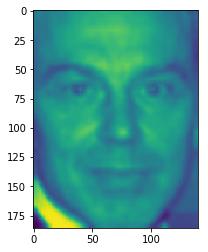

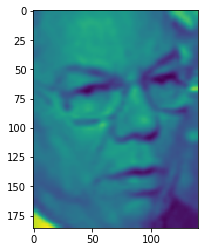

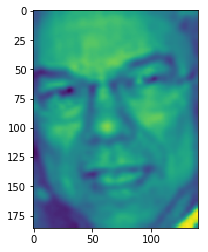

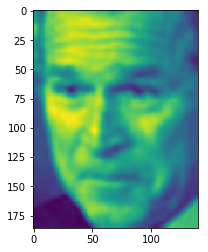

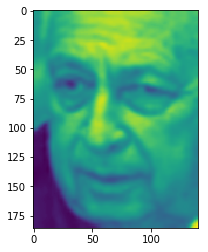

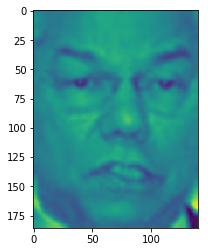

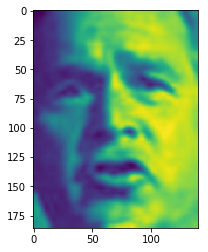

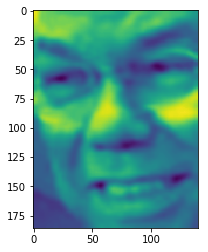

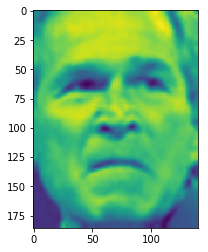

In [12]:
# loop over a random images
for i in list(map(int, np.random.randint(0, high=testLabels.shape[0], size=(10,)))):
    image = testData[i].reshape((62,47))
    name = dataset.target_names[testLabels[i]]
    image = imutils.resize(image.astype("uint8"), width=image.shape[1] * 3, inter=cv2.INTER_CUBIC)
    
    #classify the face
    prediction = model.predict(testData[i].reshape(1,-1))[0]
    prediction = dataset.target_names[prediction]
    print("[PREDICTION] predicted: {}, actual: {}".format(prediction, name))
    plt.figure()
    plt.imshow(image)